# <img style="float: left; padding: 0px 10px 0px 0px;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/84/Escudo_de_la_Pontificia_Universidad_Cat%C3%B3lica_de_Chile.svg/1920px-Escudo_de_la_Pontificia_Universidad_Cat%C3%B3lica_de_Chile.svg.png"  width="80" /> IMT2230 - Álgebra Lineal para Ciencia de Datos 
**Pontificia Universidad Católica de Chile**<br>
**Semestre 2023-2**<br>
<br>**Profesor/a:** Cristobal Rojas<br>
**Ayudante:** Pablo Rademacher <br>
**Integrantes:** RODRIGO ANDRÉS MARTÍNEZ BECERRA y NICOLAS ALEJANDRO ORTIZ MUNOZ<br>





---

In [1]:
# librerias 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

---

# P1

#### A) Implementacion del algoritmo de gram-schmidt

---


In [2]:
# Algoritmo de gram schmidt

proy = lambda v1, v2: v1 - sum([np.dot(v1, i) * i for i in v2])
norm = lambda v1: v1 / np.linalg.norm(v1) 

def gram_schmidt(v):
    v_e = [] # lista de vectores ortonormales 
    for vector in v: 
        v_e.append(norm(proy(vector, v_e)))
    return v_e

#### Carga de los archivos de datos y ortonormalizacion de los vectores

---

Se cargan los vectores y en la variable ```arrays_ortonormales``` se encuentran todas las bases ortonormales del archivo


In [17]:
with open("data/datos_P1.txt") as file:
    data = file.readlines()
    arrays = {}
    for k in range(len(data)):
        if len(data[k]) < 4:
            vectors = data[k + 1: k + 1 * int(data[k]) + 1]
            vectors = [[float(k) for k in i.strip().split(",")] for i in vectors]
            arrays[int(data[k])] = np.array(vectors)

arrays_ortonormales = {}

for k in arrays:
    arrays_ortonormales[k] = gram_schmidt(arrays[k])

arrays_ortonormales

{5: [array([ 0.31208102,  0.31289584,  0.27047902, -0.1582054 , -0.20065629,
          0.33340306, -0.74356381, -0.04696901]),
  array([ 0.42929994,  0.1285058 ,  0.26621609, -0.27218611,  0.21374475,
         -0.31734669,  0.14496047,  0.6977265 ]),
  array([-0.01465814, -0.57311923,  0.42734548, -0.28412525, -0.55470279,
          0.22327203,  0.21410703,  0.06768137]),
  array([ 0.4644313 , -0.23858713, -0.44101845, -0.23378393, -0.2961599 ,
         -0.5338262 , -0.15765131, -0.28406428]),
  array([-0.26444179,  0.64362459, -0.04589762, -0.5090309 , -0.35855639,
         -0.08259768,  0.31945915, -0.13099489])],
 6: [array([ 0.13212163, -0.05249702,  0.11761523,  0.0653826 ,  0.02423829,
         -0.09091837,  0.06269648, -0.01306312,  0.13291058, -0.03459261,
         -0.0366483 , -0.03205977,  0.12010644,  0.14137974, -0.04293676,
         -0.13445909,  0.03403545,  0.13262643,  0.04086999,  0.12771692,
         -0.08696766, -0.06107191, -0.05028229, -0.1407894 ,  0.08859171,
   

#### B) Uso del algoritmo de gram-schmidt 

In [28]:
epsilon = 10e-12
vectors = np.array([[1 + epsilon, 1, 1], [1, 1 + epsilon, 1], [1, 1, 1 + epsilon]])
vectors = gram_schmidt(vectors)
print(np.dot(vectors[0], vectors[2]))
print(np.dot(vectors[0], vectors[1]))
print(np.dot(vectors[1], vectors[2]))   

-4.082456595000394e-12
-4.082456595000394e-12
0.5000000000000001


A simple vista se puede observar que los vectores de la base ortonormalizada son ortogonales entre si, pero sabemos que ```-4.082e-12``` no es igual a ```0```, ya que para que sea considerado como ```0``` debe ser menor a ```1e-14```. Entonces el sumar ```epsilon``` nos genera errores en el redondeo de los numeros, eso lo vemos en el caso del producto punto de v1 con v2 que nos da un numero muy pequeno, pero que no es precisamente 0 por lo mencionado anteriormente. Ademas vemos que el producto punto entre v2 y v3 es 0,5, lo cual nos indica que no son ortogonales. 

A la final ```epsilon ``` nos genera errores de precision y redondeo al momento de realizar los calculos, y esto se debe principalmente a como trabaja el computador por debajo, lo cual nos indica que debemos tener cuidado al momento de realizar calculos con numeros muy pequenos, ya que estos pueden generar errores en los calculos y en la interpretacion de los resultados.

---

# P2

---


In [4]:
LINESPACE = 1000000

# A) 

##### Exploracion de los datos

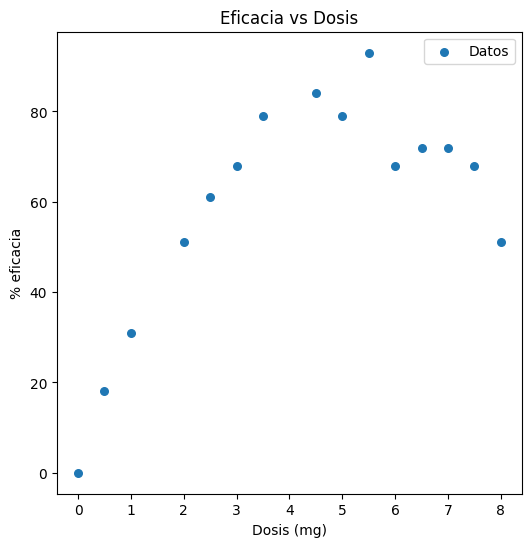

In [5]:
data = pd.read_csv('data/datos_P2.csv')
x = data['Dosis (mg)']
y = data['Eficacia']

plt.figure(figsize=(6, 6))
plt.scatter(x, y, label='Datos', s=30)
plt.xlabel('Dosis (mg)')
plt.ylabel('% eficacia')
plt.title('Eficacia vs Dosis')
plt.legend()
plt.show()

In [6]:
def regresion(datos, degree=100):
    dosis_len = datos['Dosis (mg)'].size
    A = np.zeros(shape=(dosis_len, degree+1))

    for i in range(dosis_len):
        x = datos.iloc[i]['Dosis (mg)']
        A[i] = [x**j for j in range(degree+1)]
        
    return np.linalg.inv(A).dot(datos['Eficacia'])
    
coefs = regresion(data, degree=14)
coefs

array([ 0.00000000e+00,  1.53460606e+04, -8.69707515e+04,  2.02590814e+05,
       -2.62686506e+05,  2.15358894e+05, -1.19387050e+05,  4.64647929e+04,
       -1.29429638e+04,  2.59419893e+03, -3.71109847e+02,  3.69606627e+01,
       -2.43418486e+00,  9.52606018e-02, -1.67678790e-03])

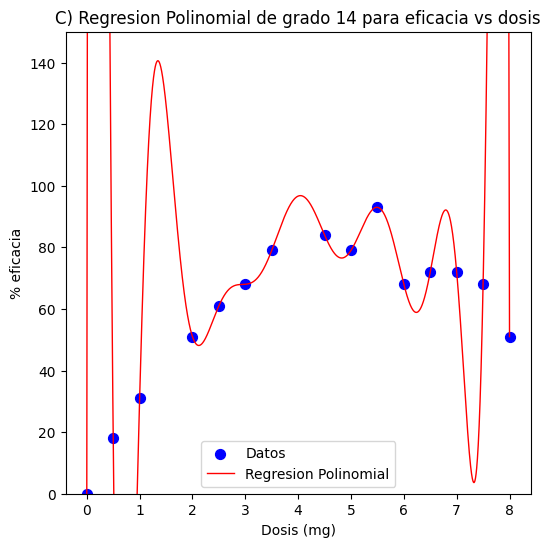

In [7]:
fig, ax = plt.subplots(figsize = (6, 6))
ax.set_ylim([0, 150])
ax.scatter(x, y, color = 'Blue', s = 50)
x = np.linspace(0, 8, LINESPACE)
ax.plot(x, np.polyval(np.flip(coefs), x), color = 'Red', linewidth = 1)
ax.set_xlabel('Dosis (mg)')
ax.set_ylabel('% eficacia')
ax.legend(['Datos', 'Regresion Polinomial'])
ax.set_title('C) Regresion Polinomial de grado 14 para eficacia vs dosis')
plt.show()
x = data['Dosis (mg)']

##### Encontrar los datos faltantes

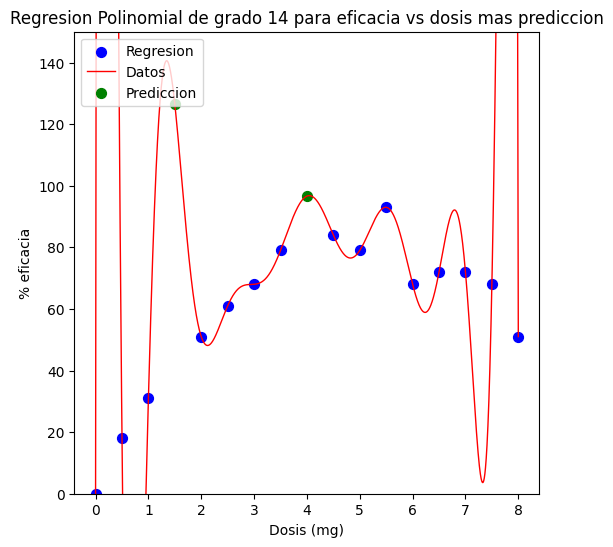

In [8]:
# dado el vector x = np.array([1.5, 4]) calcular el valor en la regresion
prediccion = np.polyval(np.flip(coefs), np.array([4, 1.5]))

fig, ax = plt.subplots(figsize = (6, 6))
ax.set_ylim([0, 150])
ax.scatter(x, y, color = 'Blue', s = 50)
x = np.linspace(0, 8, LINESPACE)
ax.plot(x, np.polyval(np.flip(coefs), x), color = 'Red', linewidth = 1)
ax.scatter(np.array([4, 1.5]), prediccion, color = 'Green', s = 50)
ax.set_xlabel('Dosis (mg)')
ax.set_ylabel('% eficacia')
ax.set_title('Regresion Polinomial de grado 14 para eficacia vs dosis mas prediccion')
plt.legend(['Regresion', 'Datos', 'Prediccion'], loc='upper left')
x = data['Dosis (mg)']

##### Solo para comprobar

In [9]:
regresion = np.polyfit(x, y, 325)

C:\Users\ortiz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\polynomial.py:667: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
C:\Users\ortiz\AppData\Local\Temp\ipykernel_18136\4218478345.py:1: RankWarning: Polyfit may be poorly conditioned
  regresion = np.polyfit(x, y, 325)


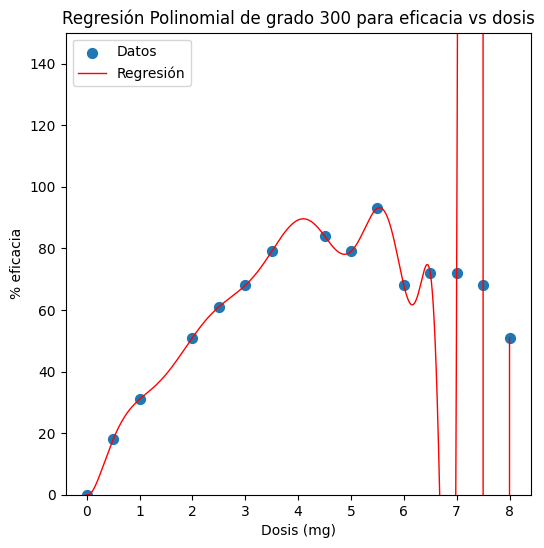

In [10]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_ylim([0, 150])
ax.scatter(x, y, label='Datos', s=50)
x = np.linspace(0, 8, LINESPACE)
ax.plot(x, np.polyval(regresion, x), 'r', label='Regresión', linewidth=1)
ax.set_xlabel('Dosis (mg)')
ax.set_ylabel('% eficacia')
ax.set_title('Regresión Polinomial de grado 300 para eficacia vs dosis')
ax.legend()
plt.show()
x = data['Dosis (mg)']

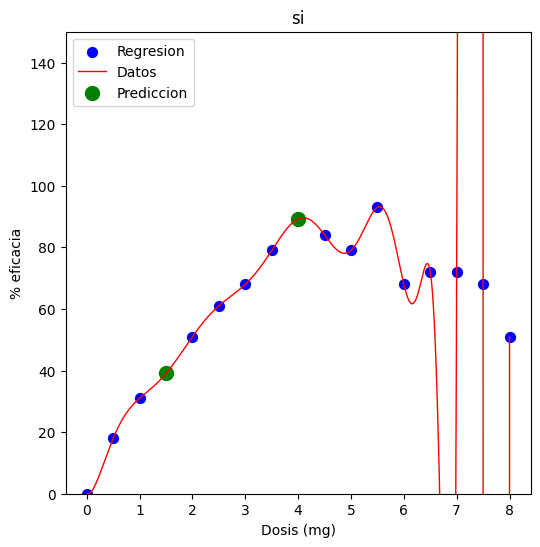

In [11]:
# dado el vector x = np.array([1.5, 4]) calcular el valor en la regresion
prediccion = np.polyval(regresion, np.array([1.5, 4]))

fig, ax = plt.subplots(figsize = (6, 6))
ax.set_ylim([0, 150])
ax.scatter(x, y, color = 'Blue', s = 50)
x = np.linspace(0, 8, LINESPACE)
ax.plot(x,  np.polyval(regresion, x), color = 'Red', linewidth = 1)
ax.scatter(np.array([1.5, 4]), prediccion, color = 'Green', s = 100)
ax.set_xlabel('Dosis (mg)', fontsize = 10)
ax.set_ylabel('% eficacia', fontsize = 10)
ax.set_title('si')
plt.legend(['Regresion', 'Datos', 'Prediccion'], loc='upper left')
x = data['Dosis (mg)']

```Observacion:``` Se logro el objetivo de aproximar "perfectamente a los datos" pero debido a que en el intento de regresion por factorizacion QR solamente lo pude aproximar con un polinomio de grado 14 si no mi funcion explotaba debido que A dejaba de tener vectores LI, pero al momento de realizar la prediccion de los datos faltantes me entrega algo totalmente erroneo, aun asi si aumento la cantidad de grados a 300 usando otras rutinas que usan SVD por debajo pude aproximar los datos de forma "perfecta".

---

# B)

<p>Como se comento en la observacion anterior existe un problema de overfitting al hecho de aproximar "perfectamente a los datos que ya tenemos" por ende el modelo que tenemos es bastante poco util para hacer predicciones robutas y certeras de otras dosis. podriamos verlo experimentalmente pero ya con unos datos bastante cercanos a nuestra prediccion es inestable por lo que con esto se sobreentiende el punto.</p>

# C)

In [12]:
# Por QR resolver el sistema de ecuaciones Ax = b
data = pd.read_csv('data/datos_P2.csv')

b = np.array(data['Eficacia'])
A = np.zeros(shape=(data['Dosis (mg)'].size, 3))

for i in range(data['Dosis (mg)'].size):
    x = data.iloc[i]['Dosis (mg)']
    A[i] = [1, x, x**2]

Q, R = np.linalg.qr(A)
coeficientes = np.linalg.inv(R).dot(Q.T).dot(b)
coeficientes = np.flip(coeficientes)
coeficientes   

array([-3.2586991 , 32.64910784,  0.91419766])

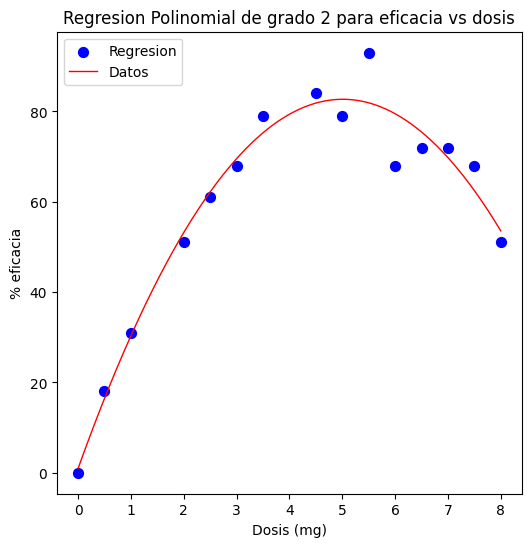

In [13]:
# graficar
x = data['Dosis (mg)']
y = data['Eficacia']

fig, ax = plt.subplots(figsize = (6, 6))
ax.scatter(x, y, color = 'Blue', s = 50)
x = np.linspace(0, 8, LINESPACE)
ax.plot(x, np.polyval(coeficientes, x), color = 'Red', linewidth = 1)
ax.set_xlabel('Dosis (mg)')
ax.set_ylabel('% eficacia')
ax.set_title('Regresion Polinomial de grado 2 para eficacia vs dosis')
plt.legend(['Regresion', 'Datos'], loc='upper left')
x = data['Dosis (mg)']

# D)


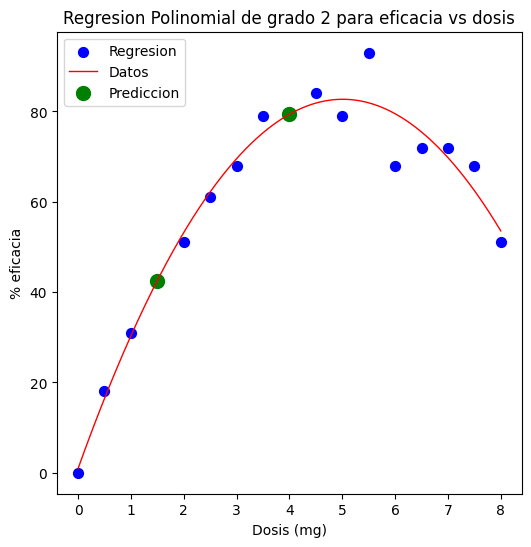

In [14]:
prediccion_cuad = np.polyval(coeficientes, np.array([4, 1.5]))

fig, ax = plt.subplots(figsize = (6, 6))
ax.scatter(x, y, color = 'Blue', s = 50)
x = np.linspace(0, 8, LINESPACE)
ax.plot(x, np.polyval(coeficientes, x), color = 'Red', linewidth = 1)
ax.scatter(np.array([4, 1.5]), prediccion_cuad, color = 'Green', s = 100)
ax.set_xlabel('Dosis (mg)')
ax.set_ylabel('% eficacia')
ax.set_title('Regresion Polinomial de grado 2 para eficacia vs dosis')
plt.legend(['Regresion', 'Datos', 'Prediccion'], loc='upper left')
x = data['Dosis (mg)']

In [15]:
# derivar el polinomio y encontrar el maximo
x_max = - coeficientes[1] / (2 * coeficientes[0])
print(f'Usando simples reglas optimizacion, maximo de eficacia se encuentra en x = {round(x_max, 4)} (mg) con una eficacia de {round(np.polyval(coeficientes, x_max), 3)}%')

Usando simples reglas optimizacion, maximo de eficacia se encuentra en x = 5.0095 (mg) con una eficacia de 82.693%


# E)

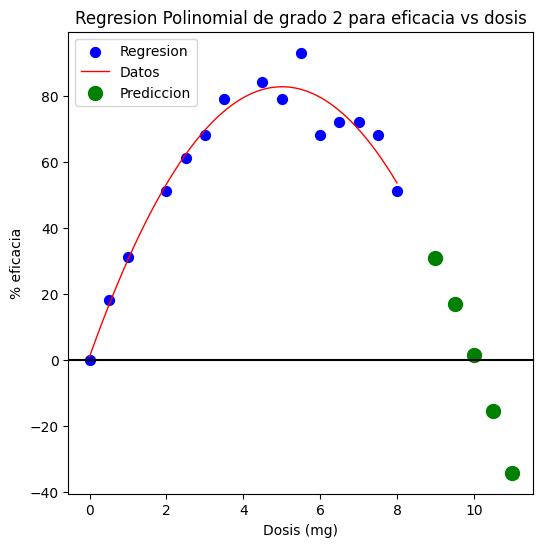

In [16]:
prediccion_cuad = np.polyval(coeficientes, np.array([9, 9.5, 10, 10.5, 11][::-1])) 

fig, ax = plt.subplots(figsize = (6, 6))
ax.scatter(x, y, color = 'Blue', s = 50)
x = np.linspace(0, 8, LINESPACE)
ax.plot(x,  np.polyval(coeficientes, x), color = 'Red', linewidth = 1)
ax.scatter(np.array([9, 9.5, 10, 10.5, 11][::-1]), prediccion_cuad, color = 'Green', s = 100)
ax.axhline(y=0, color='k')
ax.set_xlabel('Dosis (mg)')
ax.set_ylabel('% eficacia')
ax.set_title('Regresion Polinomial de grado 2 para eficacia vs dosis')
plt.legend(['Regresion', 'Datos', 'Prediccion'], loc='upper left')
x = data['Dosis (mg)']

La prediccion deja de tener sentido cuando tenemos eficacia negativa, pero es bastante confiable hasta 10 mg que to tiene efectos el mediacamento.